In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

In [ ]:
df=pd.read_csv("/content/sample_data/Cereals1.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


Q1: Create a table with the 5-number summary of all the numeric attributes.


In [ ]:

# 5 number summary
def Q1(q1):
  return q1.quantile(0.25)
def Q2(q2):
  return q2.quantile(0.50)  
def Q3(q3):
  return q3.quantile(0.75)
df.agg({
    
      "protein":["min",Q1,Q2,Q3,"max"],
     "fat":["min",Q1,Q2,Q3,"max"],
     "sodium":["min",Q1,Q2,Q3,"max"],
     "fiber":["min",Q1,Q2,Q3,"max"],
    "carbo":["min",Q1,Q2,Q3,"max"],
    "sugars":["min",Q1,Q2,Q3,"max"],
    "potass":["min",Q1,Q2,Q3,"max"],
    "vitamins":["min",Q1,Q2,Q3,"max"]
    })

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
min,1.0,0.0,0.0,0.00,-1.0,-1.0,-1.0,0.0
Q1,2.0,0.0,132.5,0.75,12.0,3.0,40.0,25.0
Q2,2.5,1.0,180.0,1.75,14.5,7.0,90.0,25.0
Q3,3.0,2.0,212.5,3.00,17.0,11.0,120.0,25.0
max,6.0,5.0,320.0,14.00,23.0,15.0,330.0,100.0


In [ ]:
df['protein'] = df['protein'].replace(-1,"NaN")
df['fat'] = df['fat'].replace(-1,"NaN")
df['sodium'] = df['sodium'].replace(-1,"NaN")
df['fiber'] = df['fiber'].replace(-1,"NaN")
df['carbo'] = df['carbo'].replace(-1,"NaN")
df['sugars'] = df['sugars'].replace(-1,"NaN")
df['potass'] = df['potass'].replace(-1,"NaN")
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8,8,135,0,3,1.00,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7,5,320,25,3,1.00,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8,0,330,25,3,1.00,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14,8,NaN,25,3,1.00,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
5,Apple_Jacks,K,C,110,2,0,125,1.0,11,14,30,25,2,1.00,1.00,33.174094
6,Basic_4,G,C,130,3,2,210,2.0,18,8,100,25,3,1.33,0.75,37.038562
7,Bran_Chex,R,C,90,2,1,200,4.0,15,6,125,25,1,1.00,0.67,49.120253
8,Bran_Flakes,P,C,90,3,0,210,5.0,13,5,190,25,3,1.00,0.67,53.313813
9,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12,12,35,25,2,1.00,0.75,18.042851


Q2: For each of the numeric attributes (proteins upto vitamins) , identify and replace all 
missing data(indicated with -1) with the arithmetic mean of the attribute.

In [ ]:
#calculating mean
df["protein"] = df["protein"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
m1=df["protein"].mean()
display(m1)
df["fat"] = df["fat"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
m2=df["fat"].mean()
display(m2)
df["sodium"] = df["sodium"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
m3=df["sodium"].mean()
display(m3)
df["fiber"] = df["fiber"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
m4=df["fiber"].mean()
display(m4)
df["carbo"] = df["carbo"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
m5=df["carbo"].mean()
display(m5)
df["sugars"] = df["sugars"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
m6=df["sugars"].mean()
display(m6)
df["potass"] = df["potass"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
m7=df["potass"].mean()
display(m7)
df["vitamins"] = df["vitamins"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
m8=df["vitamins"].mean()
display(m8)

2.526315789473684

1.013157894736842

160.06578947368422

2.0486842105263157

14.933333333333334

7.04

96.21621621621621

28.289473684210527

In [ ]:
#replacing 'NaN' with the respective mean values
df['protein'] = df['protein'].replace("NaN","m1")
df['fat'] = df['fat'].replace("NaN","m2")
df['sodium'] = df['sodium'].replace("NaN","m3")
df['fiber'] = df['fiber'].replace("NaN","m4")
df['carbo'] = df['carbo'].replace("NaN","m5")
df['sugars'] = df['sugars'].replace("NaN","m6")
df['potass'] = df['potass'].replace("NaN","m7")
df['vitamins'] = df['vitamins'].replace("NaN","m8")
df.head(30)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
5,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
6,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
7,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
8,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813
9,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12.0,35.0,25,2,1.00,0.75,18.042851


Q3: Create a table with the 5-number summary of all the numeric attributes after treating 
missing values. Do you think the strategy used in dealing with missing values was 
effective?

In [ ]:
# 5 number summary
def Q1(q1):
  return q1.quantile(0.25)
def Q2(q2):
  return q2.quantile(0.50)  
def Q3(q3):
  return q3.quantile(0.75)
df.agg({
    
      "protein":["min",Q1,Q2,Q3,"max"],
     "fat":["min",Q1,Q2,Q3,"max"],
     "sodium":["min",Q1,Q2,Q3,"max"],
     "fiber":["min",Q1,Q2,Q3,"max"],
    "carbo":["min",Q1,Q2,Q3,"max"],
    "sugars":["min",Q1,Q2,Q3,"max"],
    "potass":["min",Q1,Q2,Q3,"max"],
    "vitamins":["min",Q1,Q2,Q3,"max"]
    })


,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
min,1.0,0.0,0.0,0.00,7.0,0.0,15.00,0.0
Q1,2.0,0.0,132.5,0.75,12.0,3.0,41.25,25.0
Q2,2.5,1.0,180.0,1.75,15.0,7.0,90.00,25.0
Q3,3.0,2.0,212.5,3.00,17.0,11.0,120.00,25.0
max,6.0,5.0,320.0,14.00,23.0,15.0,330.00,100.0


In [ ]:
#replacing noisy data with the median values
med1=df["potass"].median()
df['potass'] = df['potass'].replace([330,320,260,240,230],med1)
med2=df["protein"].median()
df["protein"]=df["protein"].replace([5,6],med2)
med3=df["sodium"].median()
df["sodium"]=df["sodium"].replace([0],med3)
med5=df["fiber"].median()
df["fiber"]=df["fiber"].replace([9,14],med5)

Q5:Create a table with the 5-number summary of all the numeric attributes after treating 
noisy values. Do you think the strategy used in dealing with noisy values was 
effective? 

In [ ]:
# 5 number summary
def Q1(q1):
  return q1.quantile(0.25)
def Q2(q2):
  return q2.quantile(0.50)  
def Q3(q3):
  return q3.quantile(0.75)
df.agg({
    
      "protein":["min",Q1,Q2,Q3,"max"],
     "fat":["min",Q1,Q2,Q3,"max"],
     "sodium":["min",Q1,Q2,Q3,"max"],
     "fiber":["min",Q1,Q2,Q3,"max"],
    "carbo":["min",Q1,Q2,Q3,"max"],
    "sugars":["min",Q1,Q2,Q3,"max"],
    "potass":["min",Q1,Q2,Q3,"max"],
    "vitamins":["min",Q1,Q2,Q3,"max"]
    })

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
min,1.00,0.0,15.0,0.000,7.0,0.0,15.00,0.0
Q1,2.00,0.0,147.5,0.750,12.0,3.0,41.25,25.0
Q2,2.25,1.0,180.0,1.625,15.0,7.0,90.00,25.0
Q3,3.00,2.0,212.5,3.000,17.0,11.0,110.00,25.0
max,4.00,5.0,320.0,6.000,23.0,15.0,200.00,100.0


In [ ]:
df.head(30)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5,15,2.00,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
1,All-Bran,K,C,70,4.0,1,260,1.75,7.0,5.0,90.0,25,3,1.00,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140,1.75,8.0,0.0,90.0,25,3,1.00,0.50,93.704912
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
5,Apple_Jacks,K,C,110,2.0,0,125,1.00,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
6,Basic_4,G,C,130,3.0,2,210,2.00,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
7,Bran_Chex,R,C,90,2.0,1,200,4.00,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
8,Bran_Flakes,P,C,90,3.0,0,210,5.00,13.0,5.0,190.0,25,3,1.00,0.67,53.313813
9,Cap'n'Crunch,Q,C,120,1.0,2,220,0.00,12.0,12.0,35.0,25,2,1.00,0.75,18.042851


Q6:Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [ ]:
#cross tabulation for 'hot' Vs 'cold' cereals for each manufacturer
crosstab1=pd.crosstab(df["mfr"],df["type"])
display(crosstab1)

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


Q7: Which is the cereal with the best rating, worst rating?

In [ ]:
#cereal with best rating
df[df.rating==df.rating.max()].name

2    All-Bran_with_Extra_Fiber
Name: name, dtype: object

In [ ]:
# cereal with worst rating
df[df.rating==df.rating.min()].name

9    Cap'n'Crunch
Name: name, dtype: object

Q8: Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.

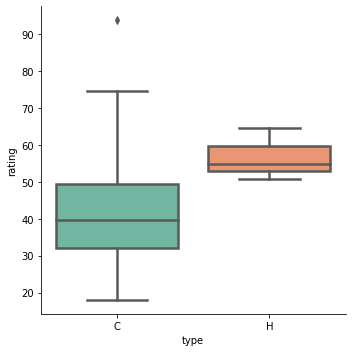

In [ ]:
#Box-plot for comparing "consumer ratings" for hot Vs cold cereals
a=sns.catplot(x="type",y="rating",data=df,linewidth=2.5,kind="box",palette="Set2")

Q9:Is there a relation between sugars, calories, carbs, and fat?

In [ ]:
#pearsons correlation coefficient
correlation1=df[["sugars","calories","carbo","fat"]].corr()
correlation1

,sugars,calories,carbo,fat
sugars,1.000000,0.574758,-0.501086,0.302610
calories,0.574758,1.000000,0.207539,0.510630
carbo,-0.501086,0.207539,1.000000,-0.313635
fat,0.302610,0.510630,-0.313635,1.000000


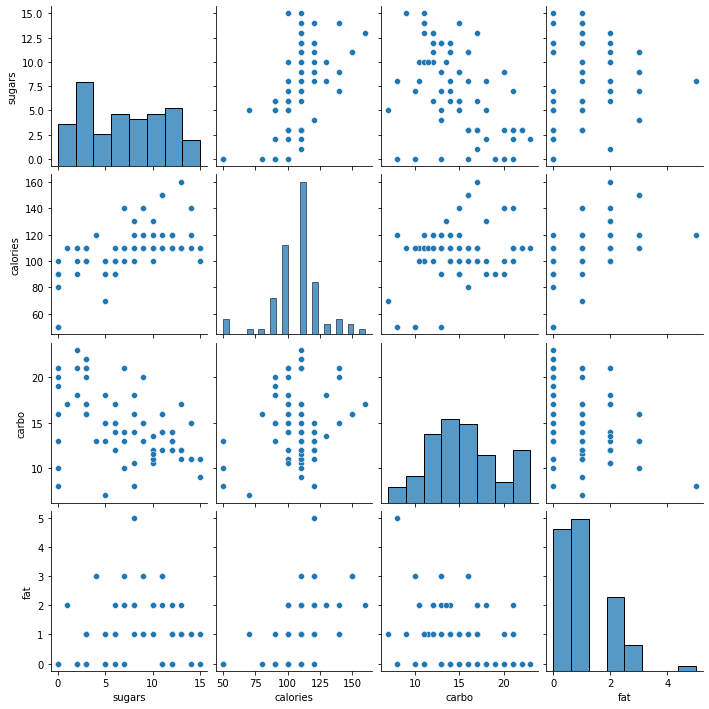

In [ ]:
#pairplot
sns.pairplot(data=df,vars=["sugars","calories","carbo","fat"])

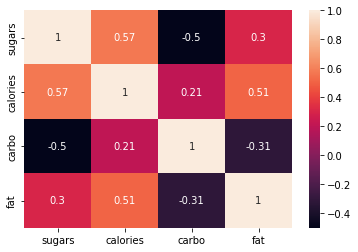

In [ ]:
#heatmap
sns.heatmap(correlation,annot=True)

Q10: Which manufacturers produce cereal with highest calories?

In [ ]:
#manufacturer producing highest calorie cereals
df[df.calories==df.calories.max()].mfr

45    K
Name: mfr, dtype: object

Q11: Use correlation tests and visualization to identify if the two variables calories and 
consumer rating associated ?


In [ ]:
##pearsons correlation coefficient
correlation2=df[["calories","rating"]].corr()
correlation2

,calories,rating
calories,1.000000,-0.674336
rating,-0.674336,1.000000


Inference: Since the value of pearsons correlation coefficient is -0.67, hence we conclude that the calories and consumer rating are negatively correlated.

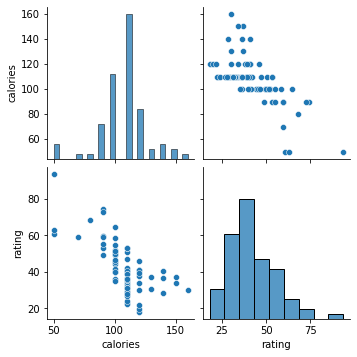

In [ ]:
#pairplot
sns.pairplot(data=df,vars=["calories","rating"])

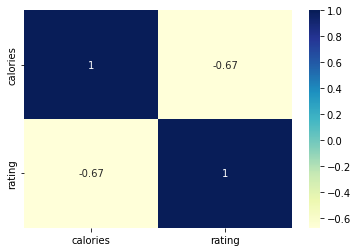

In [ ]:
#heatmap
sns.heatmap(correlation2, annot=True, cmap="YlGnBu")

Q12: Use correlation tests and visualization to identify if the two variables shelf and 
consumer rating associated? 

In [ ]:
#performing anova test
from scipy.stats import f_oneway
f_oneway(df[df.shelf==1].rating, df[df.shelf==2].rating, df[df.shelf==3].rating)  

F_onewayResult(statistic=4.5940731182577546, pvalue=0.013205326456498375)

Inference:As p-value is less than 0.05, "we reject the null hypothesis" and conclude that the mean consumer ratings associated with different shelves are different


In [ ]:
#binning
bins = [15,35,55,75,95]
df['binned_rating'] = pd.cut(df['rating'],bins)
df[['rating','binned_rating']].head()

,rating,binned_rating
0,33.983679,"(15, 35]"
1,59.425505,"(55, 75]"
2,93.704912,"(75, 95]"
3,34.384843,"(15, 35]"
4,29.509541,"(15, 35]"


In [ ]:
bins = [15,30,45,60,75,90,105]
labels =[1,2,3,4,5,6]
df['binned_rating'] = pd.cut(df['rating'], bins,labels=labels)
df[['rating','binned_rating']].head()

,rating,binned_rating
0,33.983679,2
1,59.425505,3
2,93.704912,6
3,34.384843,2
4,29.509541,1


In [ ]:
# defining the table
#data = [[207, 282, 241], [234, 242, 232]]
df1=df[['shelf','binned_rating']]
stat, p, dof, expected = chi2_contingency(df1)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9999999729667726
Independent (H0 holds true)


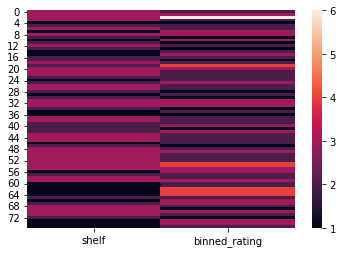

In [ ]:
sns.heatmap(df1)

Q13: Is there a relation between manufacturer and rating?

In [ ]:
#anova test
from scipy.stats import f_oneway
f_oneway(df[df.mfr=='A'].rating, df[df.mfr=='G'].rating, df[df.mfr=='K'].rating, df[df.mfr=='N'].rating, df[df.mfr=='P'].rating, df[df.mfr=='Q'].rating, df[df.mfr=='R'].rating)

F_onewayResult(statistic=5.892057149371146, pvalue=5.258870475435392e-05)

Inference:As p-value is less than 0.05, we reject the null hypothesis and conclude that the mean consumer ratings associated with different manufacturers are different

Q14: Which nutrients are essential for a good rating for a cereal?

In [ ]:
#pearsons correlation
correlation3= df[['protein', 'fat', 'carbo', 'vitamins', 'sodium', 'sugars', 'potass', 'fiber', 'rating']].corr()
correlation3

,protein,fat,carbo,vitamins,sodium,sugars,potass,fiber,rating
protein,1.000000,0.226913,-0.016297,0.075951,-0.120710,-0.226832,0.690721,0.587843,0.466606
fat,0.226913,1.000000,-0.313635,-0.031186,-0.248478,0.302610,0.387051,0.135546,-0.418439
carbo,-0.016297,-0.313635,1.000000,0.223439,0.444670,-0.501086,-0.108218,-0.110207,0.161357
vitamins,0.075951,-0.031186,0.223439,1.000000,0.187466,0.097770,-0.093283,-0.015806,-0.242516
sodium,-0.120710,-0.248478,0.444670,0.187466,1.000000,-0.288454,-0.173398,-0.124328,-0.050622
sugars,-0.226832,0.302610,-0.501086,0.097770,-0.288454,1.000000,-0.029675,-0.000181,-0.776181
potass,0.690721,0.387051,-0.108218,-0.093283,-0.173398,-0.029675,1.000000,0.791493,0.267354
fiber,0.587843,0.135546,-0.110207,-0.015806,-0.124328,-0.000181,0.791493,1.000000,0.335319
rating,0.466606,-0.418439,0.161357,-0.242516,-0.050622,-0.776181,0.267354,0.335319,1.000000


Inference: From the above correlation tests we can conclude that: 'sugars','Proteins' and 'fat' are the top 3 nutrients in terms of correlation with the "consumer ratings".

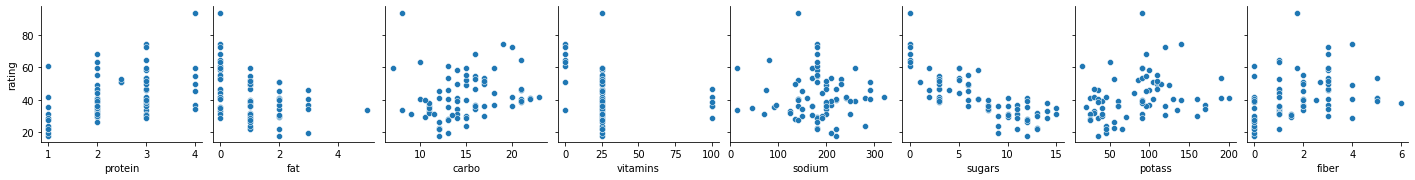

In [ ]:
#pairplot
sns.pairplot(df, x_vars=['protein', 'fat', 'carbo', 'vitamins', 'sodium', 'sugars', 'potass', 'fiber'], y_vars=['rating'])

Q15: Design a Linear regression model to predict the rating of a cereal based on top 3 
related nutrients. Tabulate the accuracy of the model using a 80 ,20 split.

In [ ]:
#top 3 nutrients Vs consumer ratings
x = df[['protein', 'fat', 'sugars']]
y = df['rating']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=109)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test, y_test)